# Praktikum Mandiri | Tugas Pertemuan 05

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: TI08 - 2022 - ML Pagi**

---

**Praktikum05**

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading Dataset dan Menampilkan file Iris

**Menghubungkan ke Google Drive**

In [2]:
# Menghubungkan colaboratory dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os

# Memanggil dataset melalui gdrive
path = "gdrive/MyDrive/MachineLearning/praktikum05/data/"

Mounted at /content/gdrive


**Membaca file CSV**

In [3]:
# Membaca file iris.csv
df = pd.read_csv(path + 'Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Menampilkan Informasi Umum Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#  4. Data Preprocessing

**Menampilkan Ringkasan Statistik**

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Mengecek Missing Value**

In [6]:
# Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**Melihat Distribusi Jumlah Data per Kelas Target (Species)**

In [7]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Melihat Data Unik (Species)**

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Encoding Data Kategorikal Kolom Species**

In [9]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# 5. Membuat Model Decision Tree, Split Data Menjadi (80% training) dan (20% testing)

In [10]:
# Menentukan fitur (X) dan target (y)
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

# Membagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(120, 30)

In [11]:
# Membuat Model Decision Tree
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

# 6. Melakukan Evaluasi Model


In [12]:
# Melakukan prediksi terhadap data testing
y_pred = dt.predict(X_test)

# Menghitung akurasi model
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Decision Tree: {akurasi:.2%}")

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model Decision Tree: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# 7. Menggunakan Dataset Testing untuk Menguji Model

In [13]:
hasil = pd.DataFrame({'Data Asli': y_test, 'Hasil Prediksi': y_pred})

print("\nPerbandingan Data Asli dan Hasil Prediksi:")
display(hasil.head())


Perbandingan Data Asli dan Hasil Prediksi:


,Data Asli,Hasil Prediksi
38,0,0
127,2,2
57,1,1
93,1,1
42,0,0


# 8. Menampilkan Feature Importance

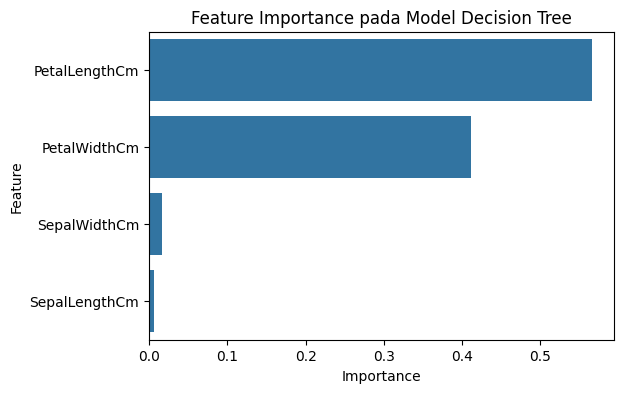

In [14]:
# Membuat dataframe untuk melihat tingkat kepentingan fitur
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title("Feature Importance pada Model Decision Tree")
plt.show()